**Step 1: Deciding (not) to Segment**

McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing straty.



**Step 2: Specifying the Ideal Target Segment**

McDonald’s needs to decide which market segments are attractive to them. The target segment should be similar within itself, different from other segments, large enough to justify a tailored marketing strategy, align with McDonald’s strengths (like being open to fast food), identifiable, and reachable through available communication and distribution channels.

An ideal segment would like McDonald’s, eat out frequently, and enjoy fast food. However, McDonald’s could also focus on segments that currently dislike them, understand why, and work to change those perceptions.

Since the dataset mostly includes McDonald’s brand image, key criteria for segment attractiveness will be how much people like McDonald’s and how often they eat there. These will help guide target segment selection later.

**Step 3: Collecting Data**

The dataset includes responses from 1,453 adult Australian consumers about their views on McDonald's based on the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. These attributes came from a prior qualitative study. Respondents answered YES if they felt McDonald's had the attribute, or NO if it didn't.

Additionally, respondents shared their AGE and GENDER. In a real market segmentation study, more data—like dining habits and media use—would typically be gathered for a more detailed segment profile.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
import pandas as pd
df = pd.read_csv('mcdonalds.csv')

# Print column names
print("Columns:", df.columns.tolist())

# Show the dimensions of the dataset
print("\nShape of the dataset:", df.shape)

# Display the first three rows of the dataset
print("\nFirst three rows of the dataset:")
print(df.head(3))

Columns: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']

Shape of the dataset: (1453, 15)

First three rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


**Step 4: Exploring Data**

In [5]:
# Segmentation variables: Extract first 5 columns for analysis
df1 = df.iloc[:, :5]

# Check for missing values and dataset info
print("Missing values per column:\n", df.isnull().sum())
df1.info()

Missing values per column:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   yummy       1453 non-null   object
 1   convenient  1453 non-null   object
 2   spicy       1453 non-null   object
 3   fattening   1453 non-null   object
 4   greasy      1453 non-null   object
dtypes: object(5)
memory usage: 56.9+ KB


In [17]:
# Convert "Yes"/"No" to 1/0
mapping = {"Yes": 1, "No": 0}
df_num = df.replace(mapping)

In [21]:
df_num

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [24]:
mcd = df_num.iloc[:, :11]

In [25]:
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [26]:
mcd.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


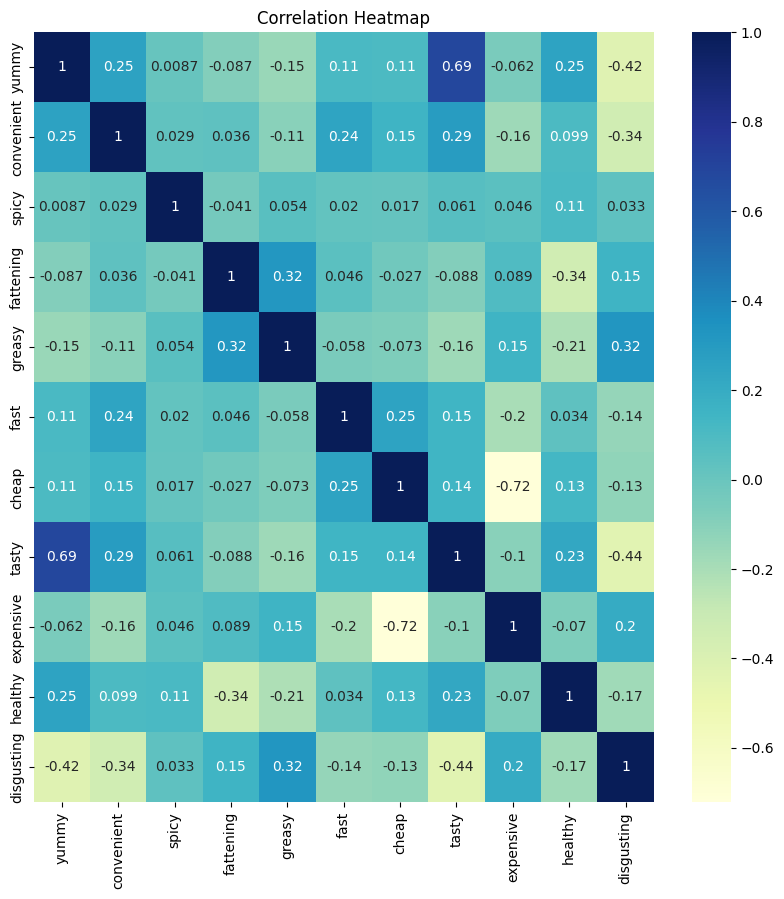

In [47]:
# Import the seaborn library
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(mcd.corr(), annot = True, cmap = 'YlGnBu') # Now sns is defined and can be used
plt.title("Correlation Heatmap")
plt.show()

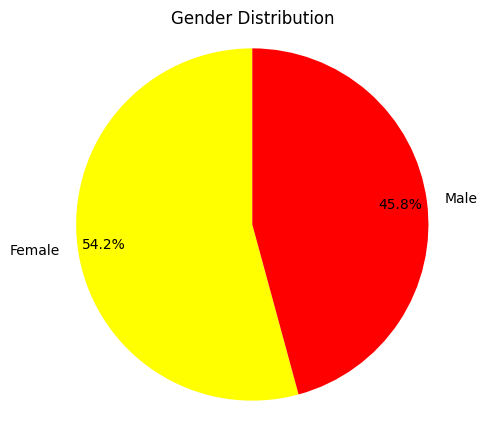

In [42]:
# Gender distribution pie chart
gender_counts = df_num['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors=['yellow', 'red'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

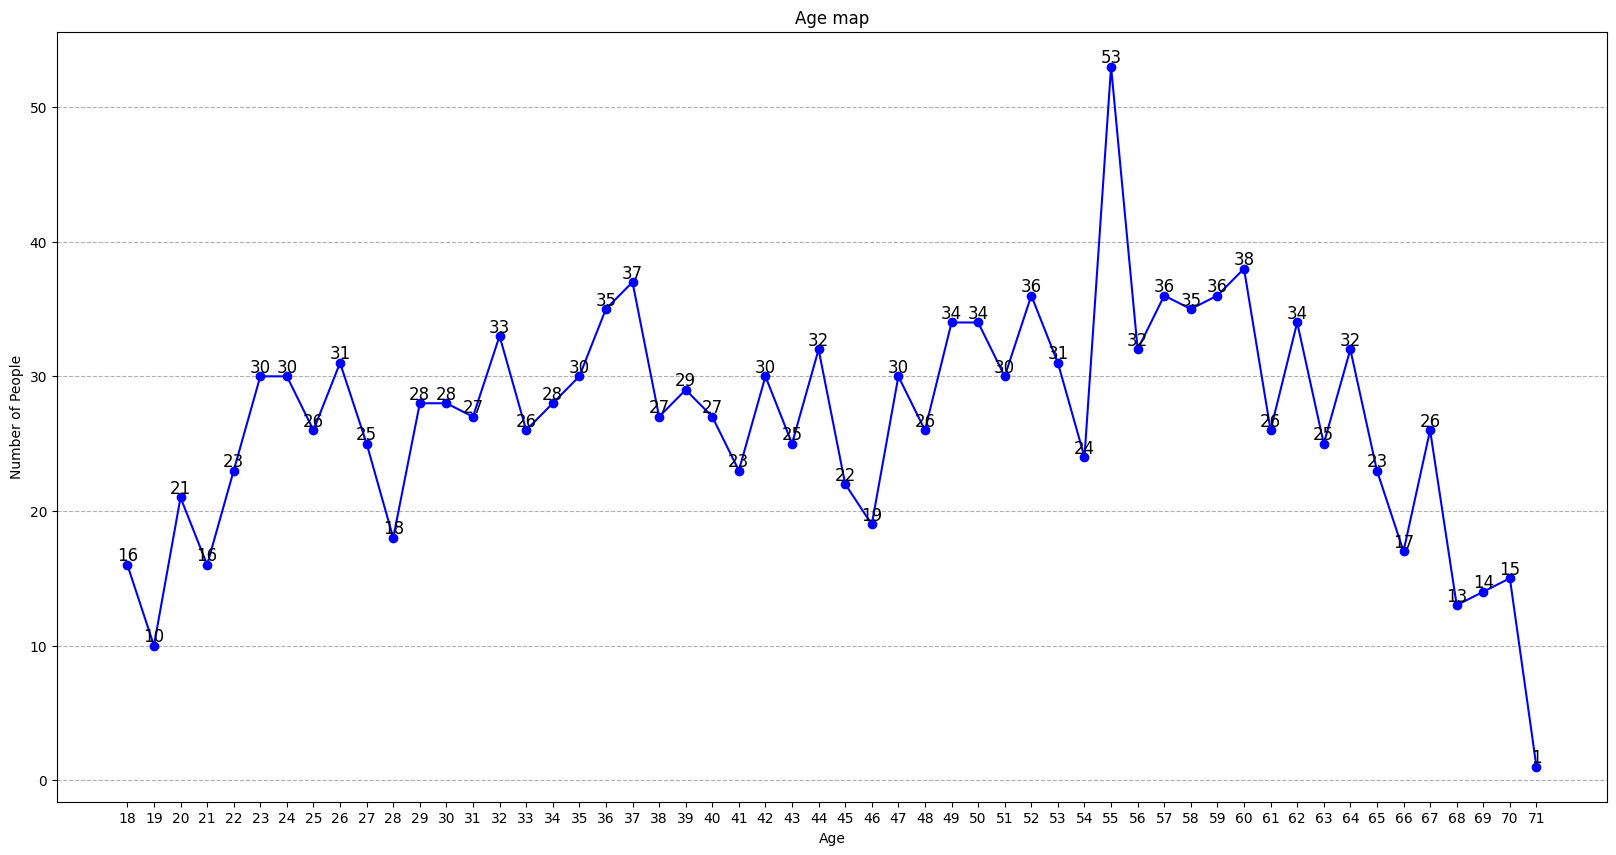

In [53]:
# Age vs Person Count line graph with point labels
age_counts = df_num['Age'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(age_counts.index, age_counts.values, color='blue', marker='o')

# Adding labels (point values) to the markers
for x, y in zip(age_counts.index, age_counts.values):
    plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')  # Annotate each point

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age map')
plt.xticks(age_counts.index)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


In [29]:
from sklearn.decomposition import PCA

# Perform PCA on the segmentation variables
pca = PCA()
pca.fit(mcd)

# Print variance explained, cumulative variance and Standard Deviation
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

print("Explained Variance by each component:\n", explained_variance)
print()
print("Cumulative Variance:\n", cumulative_variance)
print()
print("Standard Deviation of each PC:\n", std_dev.round(2))
print()

# Print the component loadings
loadings = pd.DataFrame(pca.components_.T, index=segmentation_columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Factor Loadings:")
print(loadings.round(2))

Explained Variance by each component:
 [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Variance:
 [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Standard Deviation of each PC:
 [0.76 0.61 0.5  0.4  0.34 0.31 0.29 0.28 0.27 0.25 0.24]

Factor Loadings:
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0

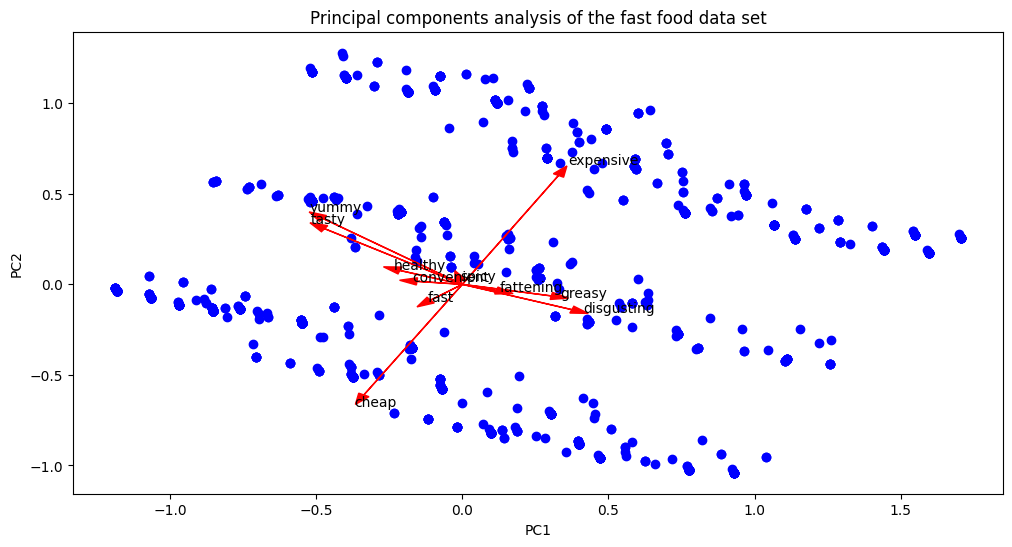

In [38]:
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(mcd)

# Create a perceptual map (scatter plot) of the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue')
loadings = pca.components_.T
for i, column in enumerate(segmentation_columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red',head_width=0.04)
    plt.text(loadings[i,0] * 1.1, loadings[i,1] * 1.1, column, color='black')

plt.title('Principal components analysis of the fast food data set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Step 5: Extracting Segments**

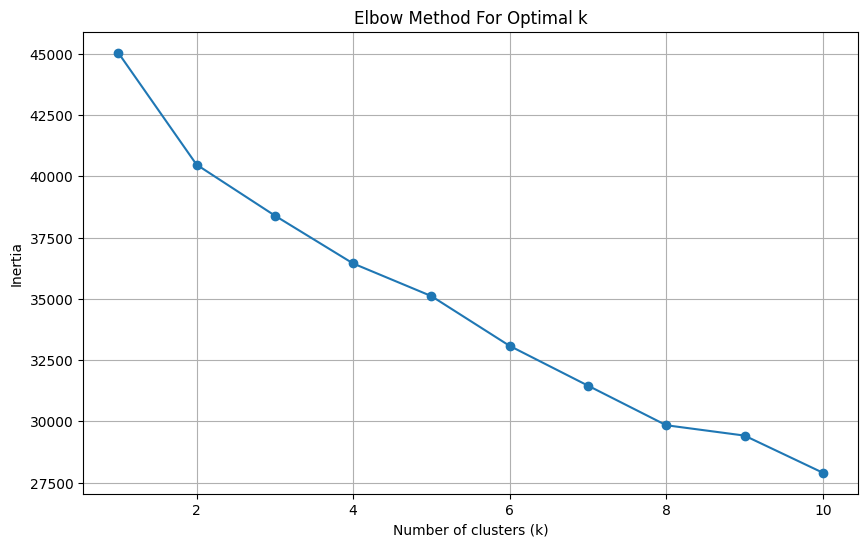

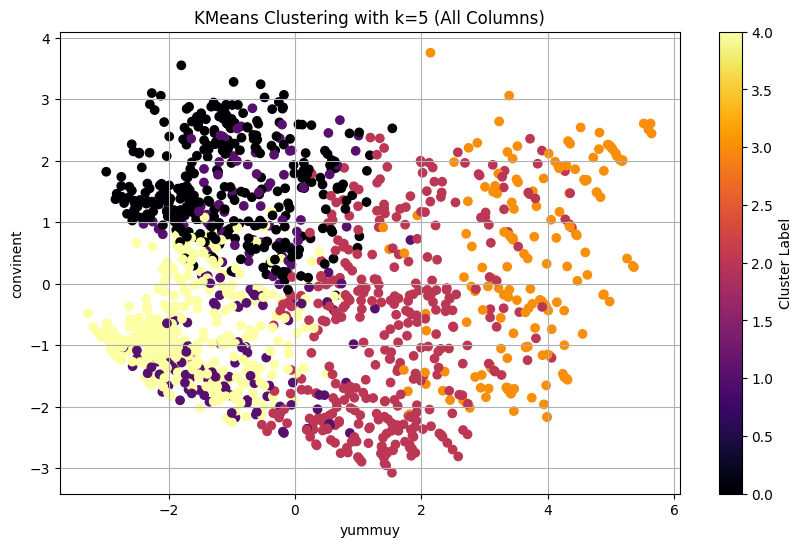

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Assume all columns in the dataset are relevant
# Extract all columns
md = df

# Identify categorical columns
categorical_cols = md.select_dtypes(include=['object']).columns.tolist()

# Create a pipeline for preprocessing (One-hot encoding for categorical and scaling for all)
preprocessor = Pipeline(steps=[
    ('onehot', ColumnTransformer([('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')),
    ('scaler', StandardScaler())
])

# Fit and transform the data for all columns
md_preprocessed = preprocessor.fit_transform(md)

# Elbow method to find optimal k
inertia = [KMeans(n_clusters=k, random_state=1234).fit(md_preprocessed).inertia_ for k in range(1, 11)]

# Plot Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# KMeans clustering with k=5 (as an example)
kmeans = KMeans(n_clusters=5, random_state=1234)
labels = kmeans.fit_predict(md_preprocessed)

# PCA for 2D visualization (reduce to 2 principal components)
md_pca = PCA(n_components=2).fit_transform(md_preprocessed)

# Plot Clusters in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(md_pca[:, 0], md_pca[:, 1], c=labels, cmap='inferno', marker='o')
plt.title('KMeans Clustering with k=5 (All Columns)')
plt.xlabel('yummuy')
plt.ylabel('convinent')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

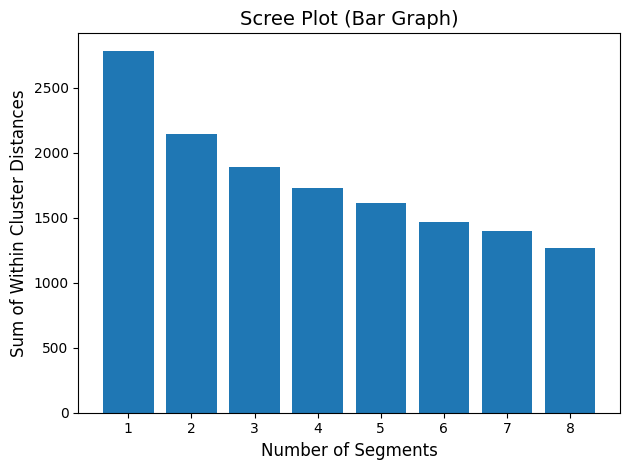

In [73]:
# Bar graph for Number of Segments
segments = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(mcd)
    segments.append(kmeans.inertia_)

plt.bar(range(1, 9), sse)
plt.xlabel('Number of Segments', fontsize=12)
plt.ylabel('Sum of Within Cluster Distances', fontsize=12)
plt.title('Scree Plot (Bar Graph)', fontsize=14)
plt.tight_layout()
plt.show()

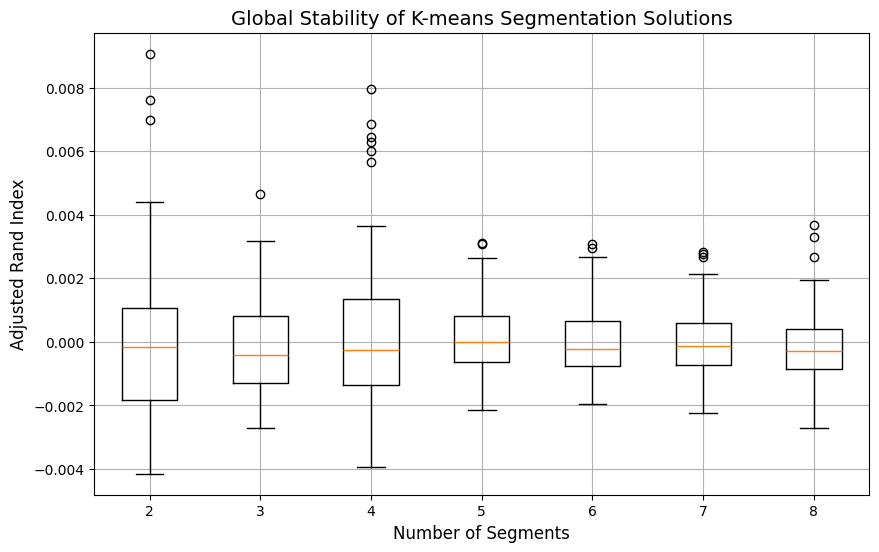

In [74]:
np.random.seed(1234)
clusters_range = range(2, 9)
n_bootstraps = 100
n_init = 10

# Store Adjusted Rand Index (ARI) for each bootstrap and number of clusters
ari_results = {k: [] for k in clusters_range}

# Perform stability analysis
for k in clusters_range:
    for _ in range(n_bootstraps):

        bootstrap_sample = resample(mcd, replace=True)
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        labels_bootstrap = kmeans.fit_predict(bootstrap_sample)

        # Fit K-means to the original data with the same number of clusters
        kmeans_original = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        labels_original = kmeans_original.fit_predict(mcd)

        # Compute the Adjusted Rand Index between bootstrap and original clustering
        ari = adjusted_rand_score(labels_original, labels_bootstrap)
        ari_results[k].append(ari)

plt.figure(figsize=(10, 6))
plt.boxplot([ari_results[k] for k in clusters_range], labels=clusters_range)
plt.xlabel('Number of Segments', fontsize=12)
plt.ylabel('Adjusted Rand Index', fontsize=12)
plt.title('Global Stability of K-means Segmentation Solutions', fontsize=14)
plt.grid(True)
plt.show()

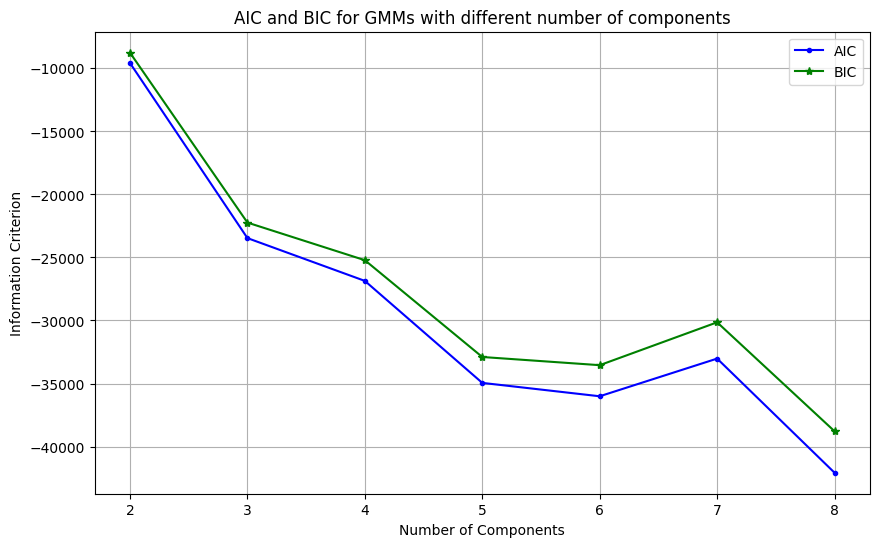

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Fit Gaussian Mixture Models from k = 2 to 8
n_components_range = range(2, 9)
models = {}
aic_values = []
bic_values = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(mcd)

    aic_values.append(gmm.aic(mcd))
    bic_values.append(gmm.bic(mcd))
    models[n_components] = gmm

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, marker='.', label='AIC' ,color='blue')
plt.plot(n_components_range, bic_values, marker='*', label='BIC', color='green')
plt.title('AIC and BIC for GMMs with different number of components')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid()
plt.show()

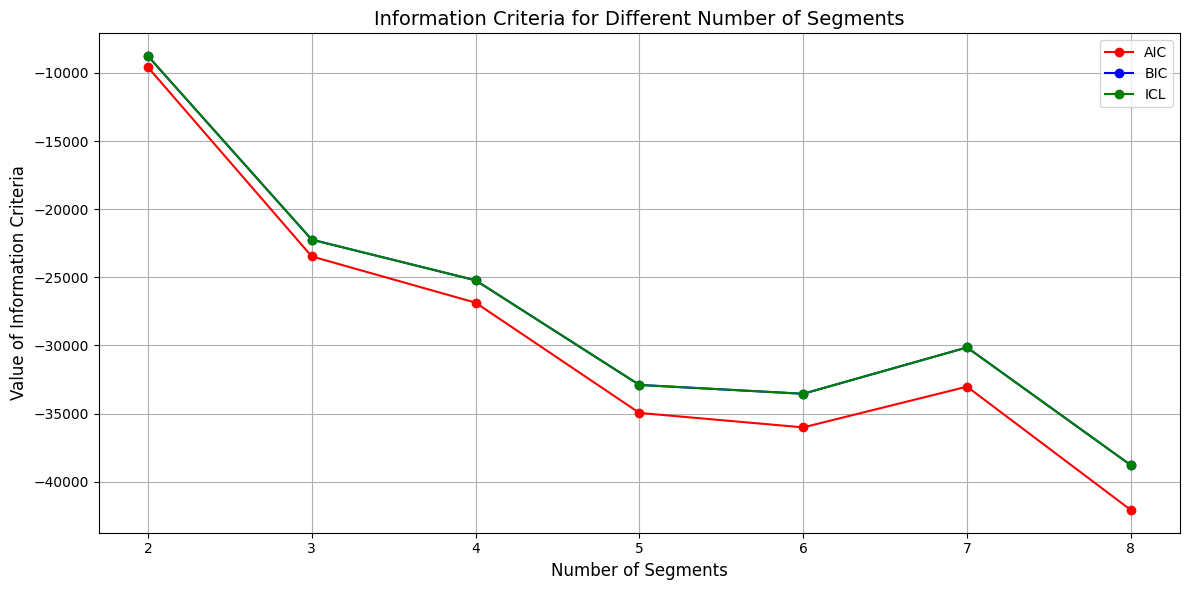

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# Assuming mcd is your DataFrame
# Convert to numpy array for clustering
X = mcd

# Parameters
cluster_range = range(2, 9)
n_rep = 10

# Fit mixture models and extract information criteria
aic = []
bic = []
icl = []

for k in cluster_range:
    models = [GaussianMixture(n_components=k, random_state=1234).fit(X) for _ in range(n_rep)]
    best_model = min(models, key=lambda model: model.aic(X))
    aic.append(best_model.aic(X))
    bic.append(best_model.bic(X))
    icl.append(best_model.bic(X))  # Note: ICL is not directly available; using BIC here

# Plot the information criteria
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, aic, marker='o', linestyle='-', color='r', label='AIC')
plt.plot(cluster_range, bic, marker='o', linestyle='-', color='blue', label='BIC')
plt.plot(cluster_range, icl, marker='o', linestyle='-', color='g', label='ICL')
plt.xlabel('Number of Segments', fontsize=12)
plt.ylabel('Value of Information Criteria', fontsize=12)
plt.title('Information Criteria for Different Number of Segments', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Segment 1:
                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     35.77
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           3.67e-57
Time:                        20:58:53   Log-Likelihood:                -1182.9
No. Observations:                 545   AIC:                             2390.
Df Residuals:                     533   BIC:                             2441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0641      0.434     -4.

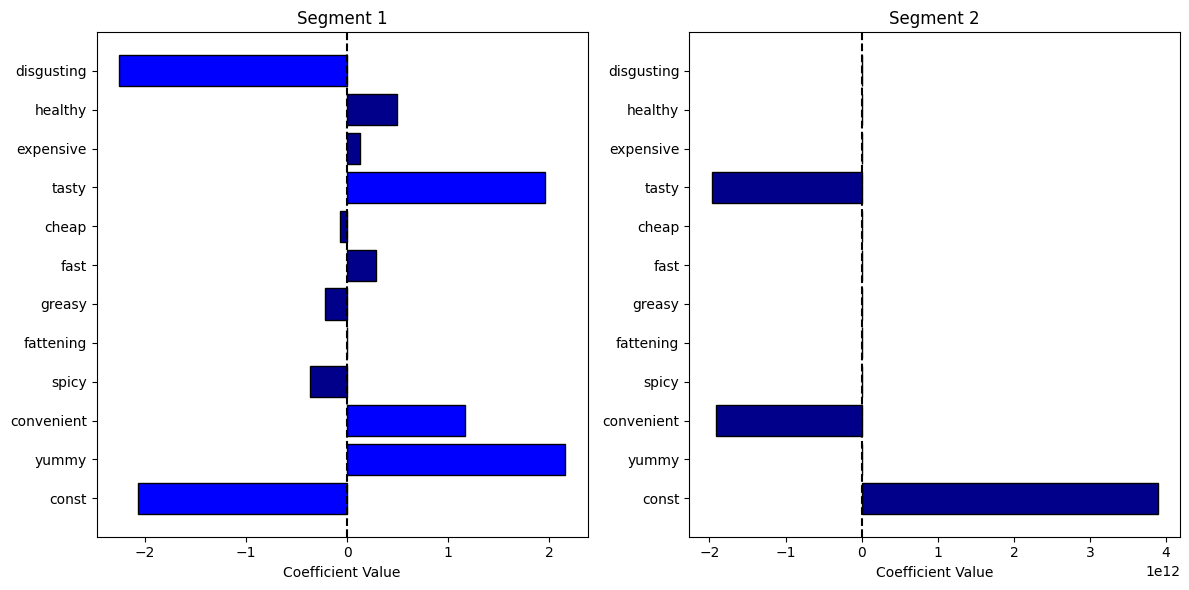

In [91]:
# Convert 'Like' into a numeric dependent variable 'Like.n'
like_mapping = {
    'I love it!+5': 1, '+4': 2, '+3': 3, '+2': 4, '+1': 5,
    '0': 6, '-1': 7, '-2': 8, '-3': 9, '-4': 10, 'I hate it!-5': 11}
df['Like.n'] = 6 - df['Like'].map(like_mapping)

# Independent variables
X = df.iloc[:, :11].replace({'Yes': 1, 'No': 0})
X = sm.add_constant(X)
y = df['Like.n']

# Fit Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, random_state=1234)
df['Segment'] = gmm.fit_predict(X)

regression_results = {}

# Fit regression models for each segment using statsmodels
for segment in np.unique(df['Segment']):
    X_segment = X[df['Segment'] == segment]
    y_segment = y[df['Segment'] == segment]

    # Fit the regression model for the segment
    model = sm.OLS(y_segment, X_segment).fit()
    regression_results[segment] = model
    print(f"\nSegment {segment + 1}:")
    print(model.summary())

# Plot regression coefficients for both segments
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

variable_names = X.columns

# Plot coefficients for each segment
for i, segment in enumerate(regression_results):
    model = regression_results[segment]
    coef = model.params
    p_values = model.pvalues

    # Highlight significant coefficients (p-value < 0.05)
    significance = np.where(p_values < 0.05, 'darkgray', 'lightgray')
    axes[i].barh(variable_names, coef, color=significance, edgecolor='black')
    axes[i].set_title(f'Segment {segment + 1}')
    axes[i].axvline(0, color='black', linestyle='--')
    axes[i].set_xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

**Step 6: Profiling Segments**

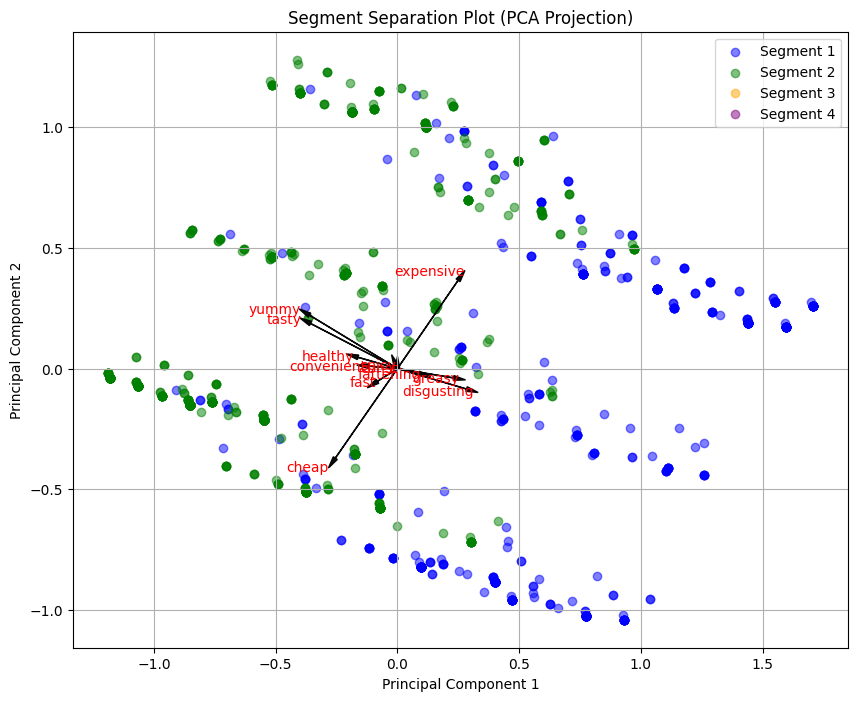

In [92]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'purple']
for i in range(4):
    ax.scatter(X_pca[df['Segment'] == i, 0], X_pca[df['Segment'] == i, 1],
               color=colors[i], label=f'Segment {i + 1}', alpha=0.5)

# Plot arrows for the original attributes
attributes = X.columns
for i, attribute in enumerate(attributes):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='black', alpha=0.95, head_width=0.02, head_length=0.05)
    ax.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, attribute, color='red', ha='right', va='center')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Segment Separation Plot (PCA Projection)')
ax.legend()
plt.grid(True)
plt.show()

**Step 7: Describing Segment**

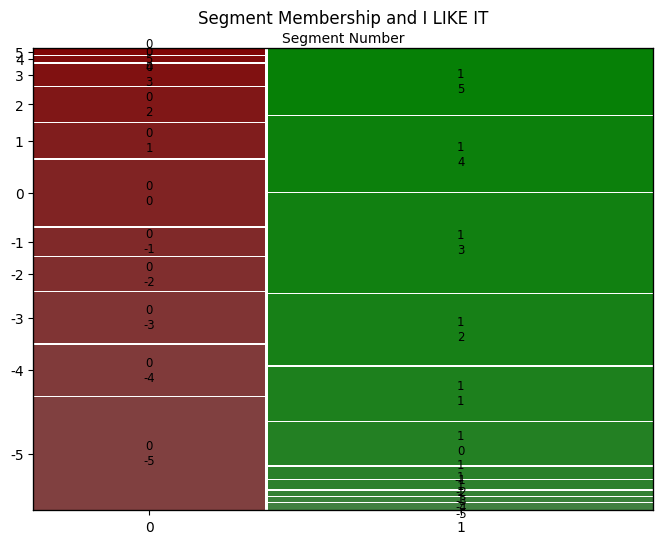

In [94]:
from statsmodels.graphics.mosaicplot import mosaic


cross_tab_like = pd.crosstab(df['Segment'], df['Like.n'])
# Plot the shaded mosaic plot
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(cross_tab_like.stack(), title='Segment Membership and I LIKE IT', ax=ax)
plt.xlabel('Segment Number')
plt.ylabel('I LIKE IT Score')
plt.show()

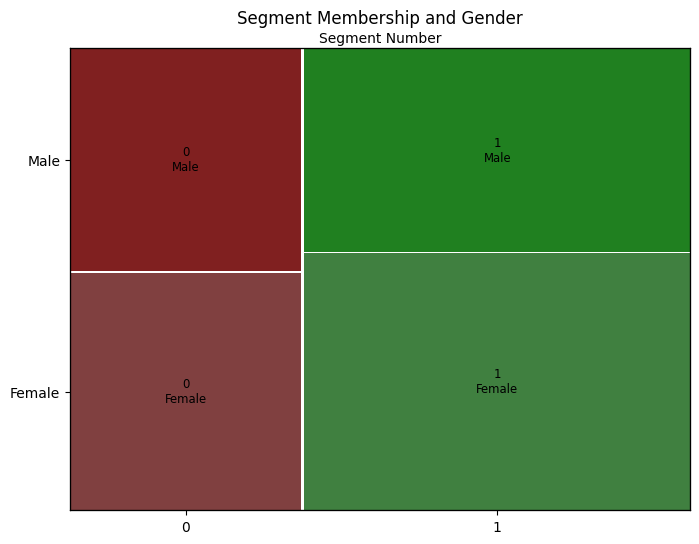

In [95]:
# Cross-tabulate the data
cross_tab_gender = pd.crosstab(df['Segment'], df['Gender'])

# Plot the shaded mosaic plot for Gender
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(cross_tab_gender.stack(), title='Segment Membership and Gender', ax=ax)
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.show()


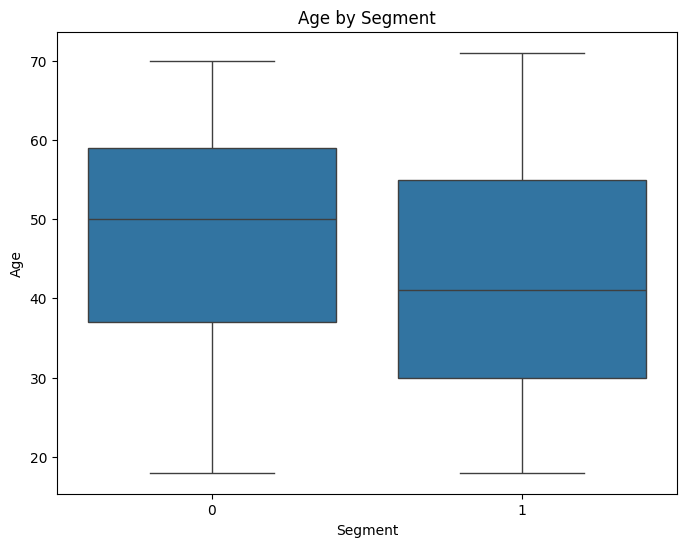

In [96]:
# Plot the box-and-whisker plot for Age by Segment
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Segment', y='Age', data=df, ax=ax)
ax.set_title('Age by Segment')
plt.show()

**Step 8: Selecting (the) Target Segment(s)**

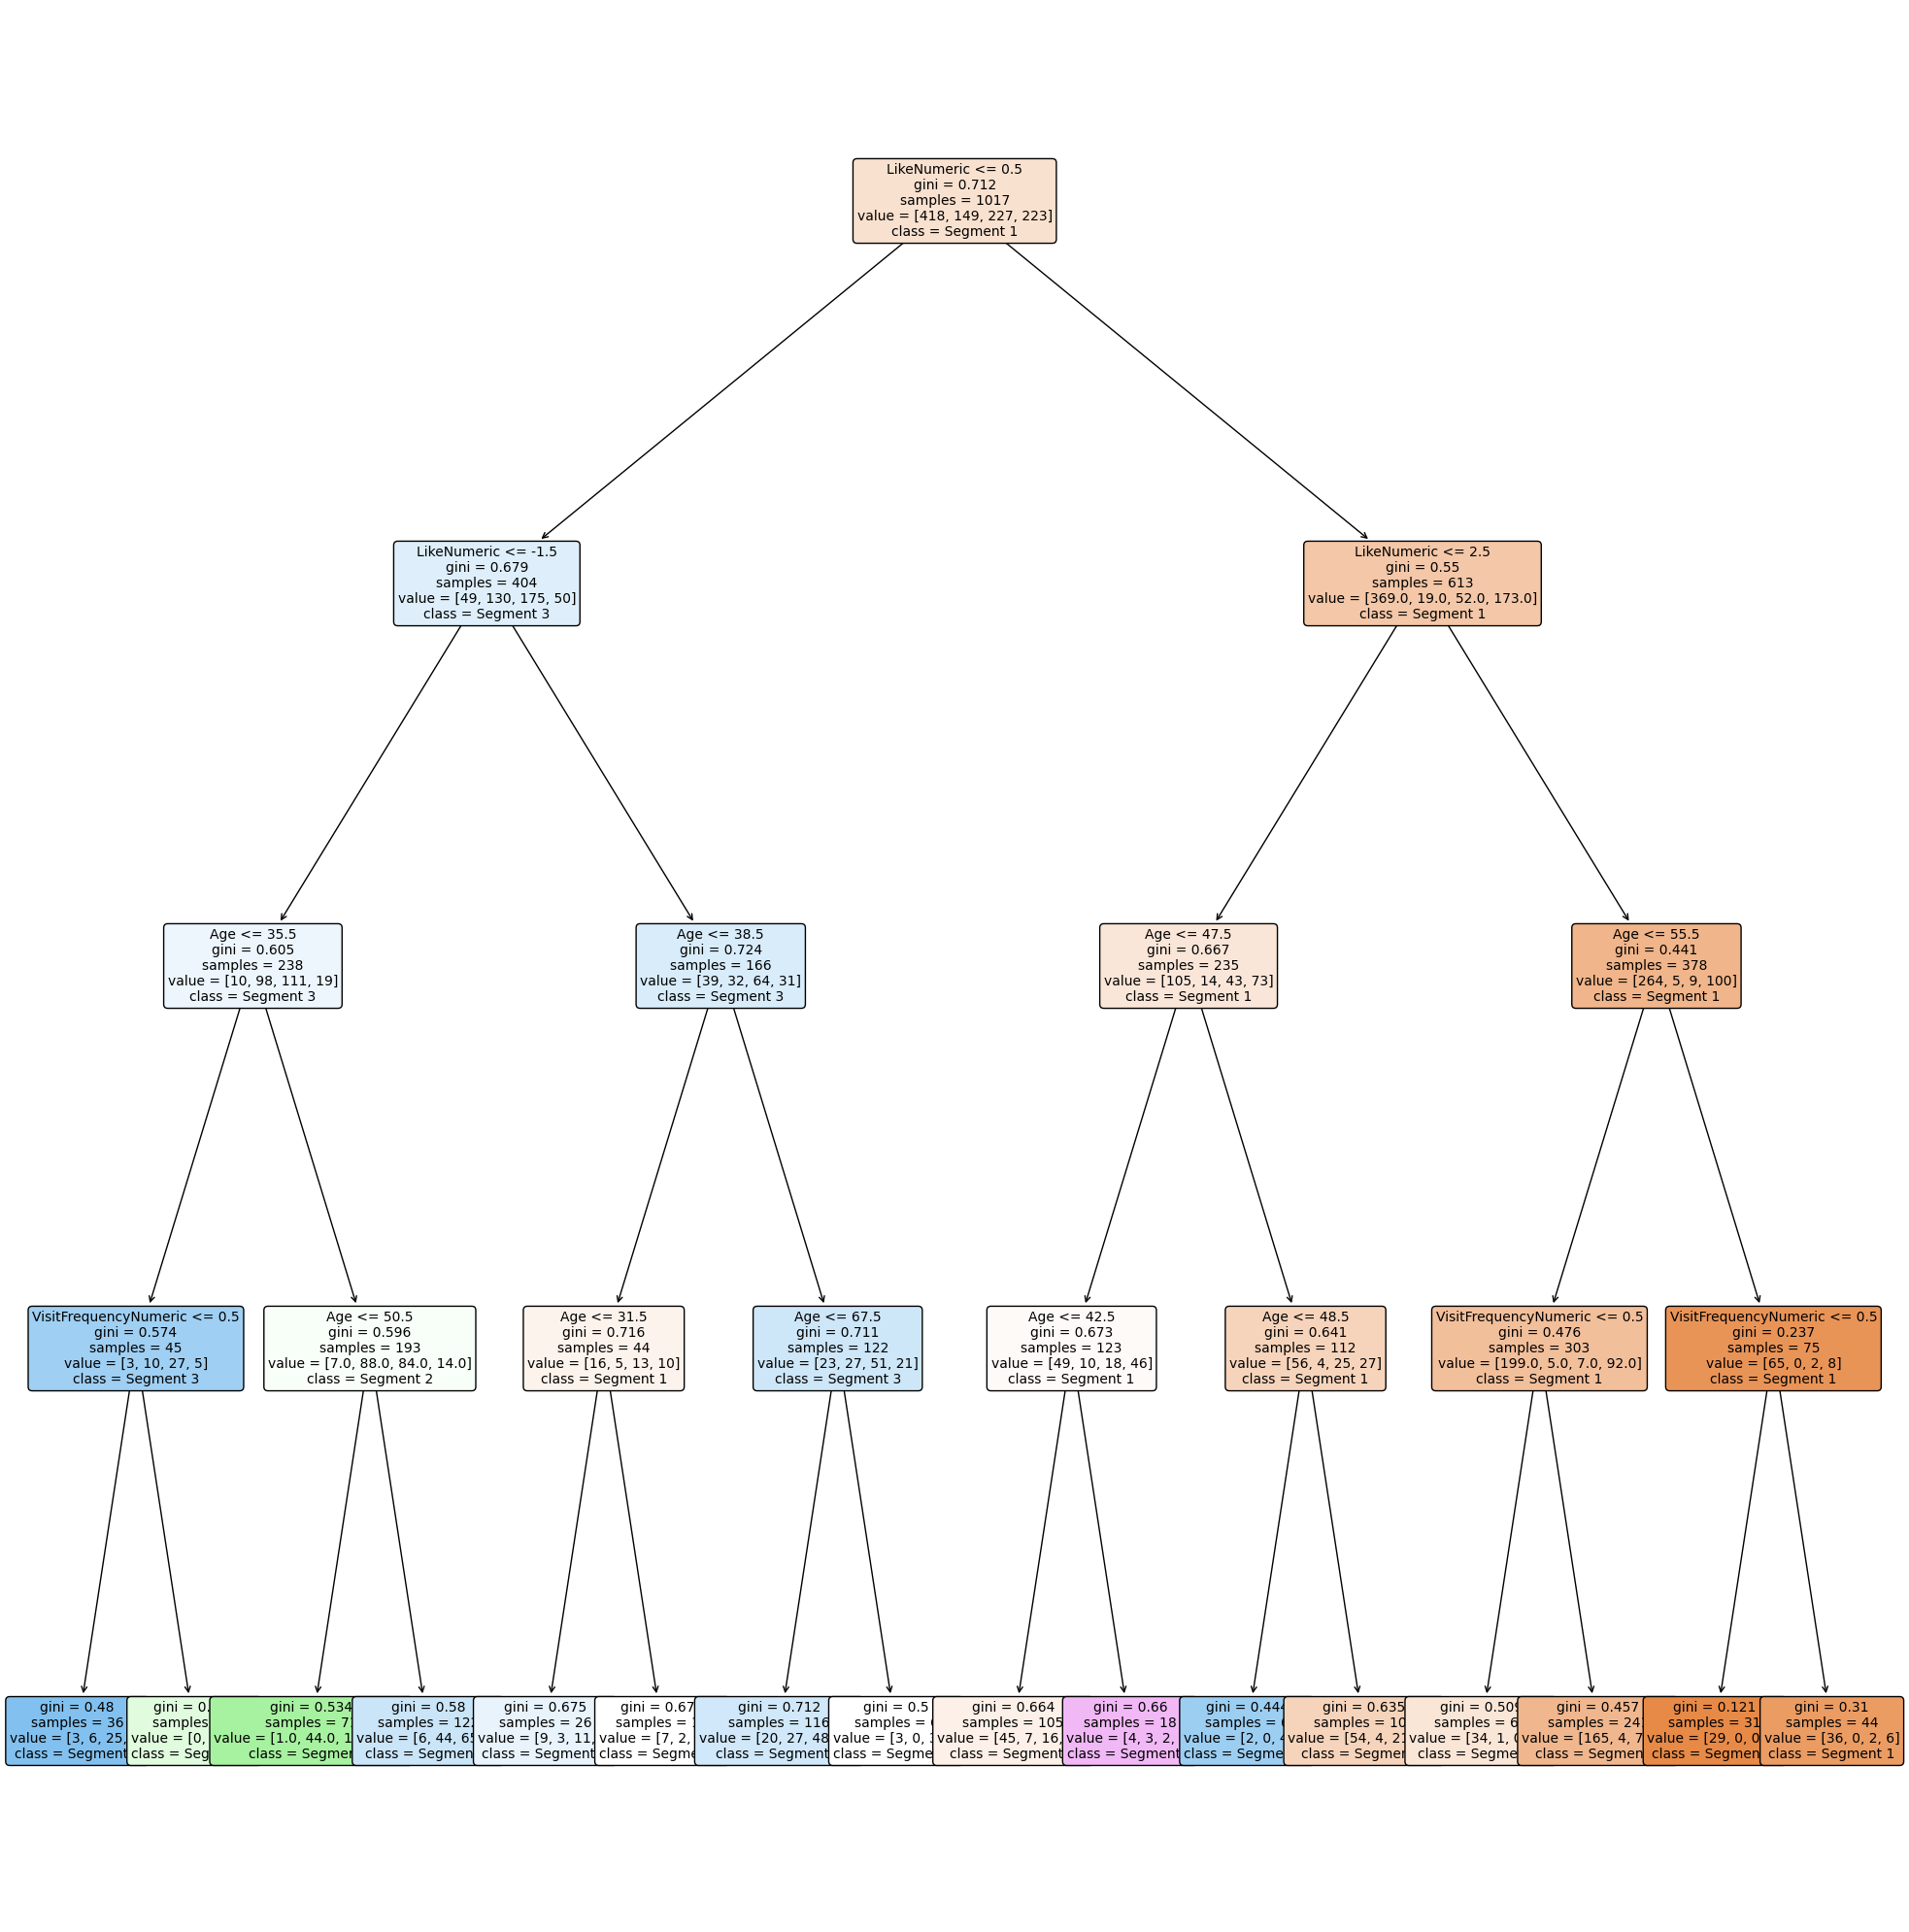

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Prepare the target variable ('Segment') by running KMeans clustering
X = df.iloc[:, :11].replace({'Yes': 1, 'No': 0})
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
df['Segment'] = kmeans.fit_predict(X)

visit_mapping = {'Every day': 5, 'Several times a week': 4, 'Once a week': 3, '2-3 times a month': 2,'Once a month': 1, 'Less than once a month': 0}
like_mapping = {'I love it!+5': 5, '+4': 4, '+3': 3, '+2': 2, '+1': 1,'0': 0, '-1': -1, '-2': -2, '-3': -3, '-4': -4, 'I hate it!-5': -5}
df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(visit_mapping)
df['LikeNumeric'] = df['Like'].map(like_mapping)

# Select relevant features
features = ['VisitFrequencyNumeric', 'LikeNumeric', 'Age']
X_tree = df[features].fillna(0)
y_tree = df['Segment']

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=features, class_names=[f'Segment {i+1}' for i in range(4)], filled=True, rounded=True, fontsize =10)
plt.tight_layout()
plt.show()